In [1]:
import pandas as pd
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
%matplotlib widget

In [37]:
header = list(pd.read_csv('TripBulkReportTripsHeaders.csv',keep_default_na=True))
header.append('Unnamed 31')
header.append('Unnamed 32')
trip_df = pd.read_csv('trips (1).csv', keep_default_na=True, names=header)
small_trips_df = pd.read_csv('trips.csv1.csv', keep_default_na=True, names=header)

In [38]:
# tripagg_df = pd.merge(trips_df, small_trips_df, on=header, )
frames = [trip_df,small_trips_df]
trips_df = pd.concat(frames)

In [66]:
trips_df.head()

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,MovementType,OriginCbg,DestCbg,StartTimezone,EndTimezone,WaypointFreqSec,StartQk,EndQk,Startlocation,Endlocation
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113121202,23101211002301332,POINT (38.73105 -104.79789),POINT (38.71176 -104.70176)
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101211002022010,23101210111330030,POINT (38.72784 -104.76219),POINT (38.76853 -104.78416)
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112222,23101033200023313,POINT (38.73748 -104.78691),POINT (39.06451 -104.74433)
3,e0f43e41709cbadf8822c72c1974e5e0,066bf8928ed16a20c8aa38236830943f,42998cf32d552343bc8e460416382dca,1,2021-04-06T12:02:42.000Z,2,2021-04-06T12:23:35.000Z,2,38.73962,-104.78553,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112203,23101210111323212,POINT (38.73962 -104.78553),POINT (38.75676 -104.79515)
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210111323333,23101211000003302,POINT (38.75461 -104.78828),POINT (38.80814 -104.74845)


In [40]:
trips_df.columns

Index(['TripId', 'DeviceId', 'ProviderId', 'Mode', 'StartDate', 'StartWDay',
       'EndDate', 'EndWDay', 'StartLocLat', 'StartLocLon', 'EndLocLat',
       'EndLocLon', 'GeospatialType', 'ProviderType', 'ProviderDrivingProfile',
       'VehicleWeightClass', 'ProbeSourceType', 'OriginZoneName',
       'DestinationZoneName', 'EndpointType', 'TripMeanSpeedKph',
       'TripMaxSpeedKph', 'TripDistanceMeters', 'MovementType', 'OriginCbg',
       'DestCbg', 'StartTimezone', 'EndTimezone', 'WaypointFreqSec', 'StartQk',
       'EndQk', 'Unnamed 31', 'Unnamed 32'],
      dtype='object')

### 1. Make sure there are no duplicate rows & Exclude data in TX

In [41]:
number_of_dup = len(trips_df[trips_df.duplicated(subset=list(trips_df.columns).remove('TripId')) == True])
number_of_fort = len(trips_df[(trips_df['OriginZoneName']!='Buc-ee\'s Giddings TX')& (trips_df['DestinationZoneName']!='Buc-ee\'s Giddings TX')])

print('Number of rows in original data:', len(trips_df))
print('Number of data in Fort Carson : ',number_of_fort)
print('Number of duplicated rows : ',number_of_dup)

Number of rows in original data: 3235625
Number of data in Fort Carson :  3235625
Number of duplicated rows :  0


In [42]:
trips_df.head()

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,MovementType,OriginCbg,DestCbg,StartTimezone,EndTimezone,WaypointFreqSec,StartQk,EndQk,Unnamed 31,Unnamed 32
0,430562b3e55e94dbfb6ae834ed19e9b0,02f0b84069e6caba98665688b907c035,42998cf32d552343bc8e460416382dca,1,2021-04-07T22:35:03.000Z,3,2021-04-07T22:50:41.000Z,3,38.73105,-104.79789,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113121202,23101211002301332,NaN,NaN
1,96b6ea1d8075a91f0303d884d8378bf3,034bbea593bf94b8309a098651c3036c,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T23:27:12.000Z,2,2021-04-06T23:39:07.000Z,2,38.72784,-104.76219,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101211002022010,23101210111330030,NaN,NaN
2,d0ecaacf51412f7fcc3117e7eb01d12e,03b672981c5da907cf256bf0245e1d01,d07e70efcfab08731a97e7b91be644de,1,2021-04-02T21:49:56.000Z,5,2021-04-02T22:48:51.000Z,5,38.73748,-104.78691,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112222,23101033200023313,NaN,NaN
3,e0f43e41709cbadf8822c72c1974e5e0,066bf8928ed16a20c8aa38236830943f,42998cf32d552343bc8e460416382dca,1,2021-04-06T12:02:42.000Z,2,2021-04-06T12:23:35.000Z,2,38.73962,-104.78553,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210113112203,23101210111323212,NaN,NaN
4,bc40dc1213f27351388e3c8e02cc135d,0691bd9c8f51b1aa0ef73e3909ff0467,d07e70efcfab08731a97e7b91be644de,1,2021-04-06T19:13:00.000Z,2,2021-04-06T19:26:20.000Z,2,38.75461,-104.78828,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101210111323333,23101211000003302,NaN,NaN


### 2. Create geometry column

In [65]:
trips_df = trips_df[(trips_df['OriginZoneName']!='Buc-ee\'s Giddings TX')& (trips_df['DestinationZoneName']!='Buc-ee\'s Giddings TX')]
# creating a geometry column 
trips_df['Startlocation'] = list(zip(trips_df.StartLocLat, trips_df.StartLocLon))
trips_df['Startlocation'] = trips_df['Startlocation'].apply(Point)

trips_df['Endlocation'] = list(zip(trips_df.EndLocLat, trips_df.EndLocLon))
trips_df['Endlocation'] = trips_df['Endlocation'].apply(Point)

trips_df= trips_df.drop(['Unnamed 31', 'Unnamed 32'], axis=1)

# Coordinate reference system : WGS84
# crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 



In [70]:
gdf = gpd.GeoDataFrame(trips_df)

In [78]:
gdf.columns

Index(['TripId', 'DeviceId', 'ProviderId', 'Mode', 'StartDate', 'StartWDay',
       'EndDate', 'EndWDay', 'StartLocLat', 'StartLocLon', 'EndLocLat',
       'EndLocLon', 'GeospatialType', 'ProviderType', 'ProviderDrivingProfile',
       'VehicleWeightClass', 'ProbeSourceType', 'OriginZoneName',
       'DestinationZoneName', 'EndpointType', 'TripMeanSpeedKph',
       'TripMaxSpeedKph', 'TripDistanceMeters', 'MovementType', 'OriginCbg',
       'DestCbg', 'StartTimezone', 'EndTimezone', 'WaypointFreqSec', 'StartQk',
       'EndQk', 'Startlocation', 'Endlocation', 'MST_start_datetime',
       'MST_end_datetime', 'MST_start_date', 'MST_start_month',
       'MST_start_day', 'MST_start_year', 'MST_start_time', 'MST_start_hour',
       'MST_start_minute', 'MST_start_second', 'MST_end_date', 'MST_end_month',
       'MST_end_day', 'MST_end_year', 'MST_end_time', 'MST_end_hour',
       'MST_end_minute', 'MST_end_second'],
      dtype='object')

### 3. Deal with Datetime

In [72]:
gdf['MST_start_datetime'] = pd.to_datetime(gdf['StartDate']).apply(lambda x:x.astimezone('MST'))
gdf['MST_end_datetime'] = pd.to_datetime(gdf['EndDate']).apply(lambda x:x.astimezone('MST'))

gdf['MST_start_date'] = gdf['MST_start_datetime'].apply(lambda x:x.date())
gdf['MST_start_time'] = gdf['MST_start_datetime'].apply(lambda x:x.time())

gdf['MST_end_date'] = gdf['MST_end_datetime'].apply(lambda x:x.date())
gdf['MST_end_time'] = gdf['MST_end_datetime'].apply(lambda x:x.time())

In [64]:
# create df of start day, month, year 
startYear = list(pd.DatetimeIndex(gdf['MST_start_date']).year)
startMonth = list(pd.DatetimeIndex(gdf['MST_start_date']).month)
startDay = list(pd.DatetimeIndex(gdf['MST_start_date']).day)

# insert the start month, day, year column into the gdf
gdf.insert(int(gdf.columns.get_indexer(['MST_start_date'])[0]+1), 'MST_start_month',startMonth)
gdf.insert(int(gdf.columns.get_indexer(['MST_start_date'])[0]+2), 'MST_start_day',startDay)
gdf.insert(int(gdf.columns.get_indexer(['MST_start_date'])[0]+3), 'MST_start_year',startYear)

# create df of start hour, minutes, and seconds
startHour = list(pd.DatetimeIndex(gdf['MST_start_datetime']).hour)
startMin = list(pd.DatetimeIndex(gdf['MST_start_datetime']).minute)
startSec = list(pd.DatetimeIndex(gdf['MST_start_datetime']).second)

# insert the start hour, minutes, seconds column into the gdf
gdf.insert(int(gdf.columns.get_indexer(['MST_start_time'])[0]+1), 'MST_start_hour',startHour)
gdf.insert(int(gdf.columns.get_indexer(['MST_start_time'])[0]+2), 'MST_start_minute',startMin)
gdf.insert(int(gdf.columns.get_indexer(['MST_start_time'])[0]+3), 'MST_start_second',startSec)

# create df of end day, month, year 
endYear = list(pd.DatetimeIndex(gdf['MST_end_date']).year)
endMonth = list(pd.DatetimeIndex(gdf['MST_end_date']).month)
endDay = list(pd.DatetimeIndex(gdf['MST_end_date']).day)

# insert the start month, day, year column into the gdf
gdf.insert(int(gdf.columns.get_indexer(['MST_end_date'])[0]+1), 'MST_end_month',endMonth)
gdf.insert(int(gdf.columns.get_indexer(['MST_end_date'])[0]+2), 'MST_end_day',endDay)
gdf.insert(int(gdf.columns.get_indexer(['MST_end_date'])[0]+3), 'MST_end_year',endYear)

# create df of end hour, minutes, and seconds
endHour = list(pd.DatetimeIndex(gdf['MST_end_datetime']).hour)
endMin = list(pd.DatetimeIndex(gdf['MST_end_datetime']).minute)
endSec = list(pd.DatetimeIndex(gdf['MST_end_datetime']).second)




# insert the start hour, minutes, seconds column into the gdf
gdf.insert(int(gdf.columns.get_indexer(['MST_end_time'])[0]+1), 'MST_end_hour',endHour)
gdf.insert(int(gdf.columns.get_indexer(['MST_end_time'])[0]+2), 'MST_end_minute',endMin)
gdf.insert(int(gdf.columns.get_indexer(['MST_end_time'])[0]+3), 'MST_end_second',endSec)


In [77]:
gdf.to_csv('trips_after_cleaning.csv')

# EDA

In [68]:
gdf = pd.read_csv('trips_after_cleaning.csv')
device_number = len(gdf['DeviceId'].unique())
print('These {} trips are from {} unique devices.'.format(len(gdf),device_number))

These 3235625 trips are from 1425379 unique devices.


In [69]:
gdf['start_year_month'] = pd.to_datetime(gdf['MST_start_datetime']).dt.to_period('M')


In [177]:
gdf['EndLocLat']

0          38.71176
1          38.76853
2          39.06451
3          38.75676
4          38.80814
             ...   
3235620    38.73319
3235621    38.73855
3235622    38.73105
3235623    38.67854
3235624    38.68711
Name: EndLocLat, Length: 3235625, dtype: float64

In [71]:
gdf['start_year_month']

0          2021-04
1          2021-04
2          2021-04
3          2021-04
4          2021-04
            ...   
3235620    2020-11
3235621    2020-10
3235622    2020-11
3235623    2020-10
3235624    2020-11
Name: start_year_month, Length: 3235625, dtype: period[M]

In [72]:
print(gdf['MST_start_datetime'].min(),gdf['MST_start_datetime'].max())

2020-09-30 17:00:09-07:00 2021-09-30 16:59:58-07:00


In [16]:
gdf.columns

Index(['Unnamed: 0', 'TripId', 'DeviceId', 'ProviderId', 'Mode', 'StartDate',
       'StartWDay', 'EndDate', 'EndWDay', 'StartLocLat', 'StartLocLon',
       'EndLocLat', 'EndLocLon', 'GeospatialType', 'ProviderType',
       'ProviderDrivingProfile', 'VehicleWeightClass', 'ProbeSourceType',
       'OriginZoneName', 'DestinationZoneName', 'EndpointType',
       'TripMeanSpeedKph', 'TripMaxSpeedKph', 'TripDistanceMeters',
       'MovementType', 'OriginCbg', 'DestCbg', 'StartTimezone', 'EndTimezone',
       'WaypointFreqSec', 'StartQk', 'EndQk', 'Startlocation', 'Endlocation',
       'MST_start_datetime', 'MST_end_datetime', 'MST_start_date',
       'MST_start_month', 'MST_start_day', 'MST_start_year', 'MST_start_time',
       'MST_start_hour', 'MST_start_minute', 'MST_start_second',
       'MST_end_date', 'MST_end_month', 'MST_end_day', 'MST_end_year',
       'MST_end_time', 'MST_end_hour', 'MST_end_minute', 'MST_end_second'],
      dtype='object')

### 2. Walk vs. Vehicle

[Text(0, 0, '    50345'), Text(0, 0, '  3185280')]

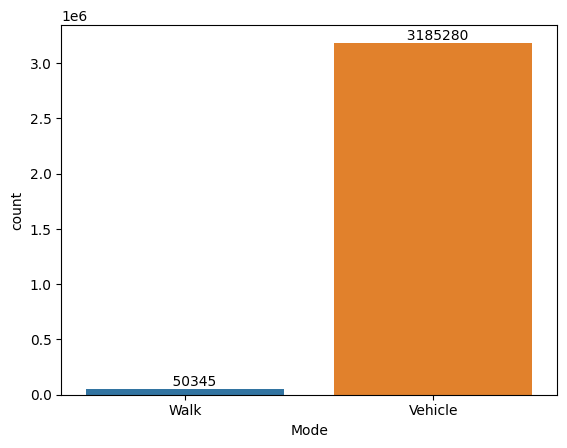

In [150]:
count_plot = sns.countplot(gdf['Mode'])
count_plot.set_xticklabels(['Walk','Vehicle']) 
count_plot.bar_label(count_plot.containers[0],fmt='%9.0f')

### 3. Vehicle type

[Text(0, 0, '  1514599'), Text(0, 0, '  1721026')]

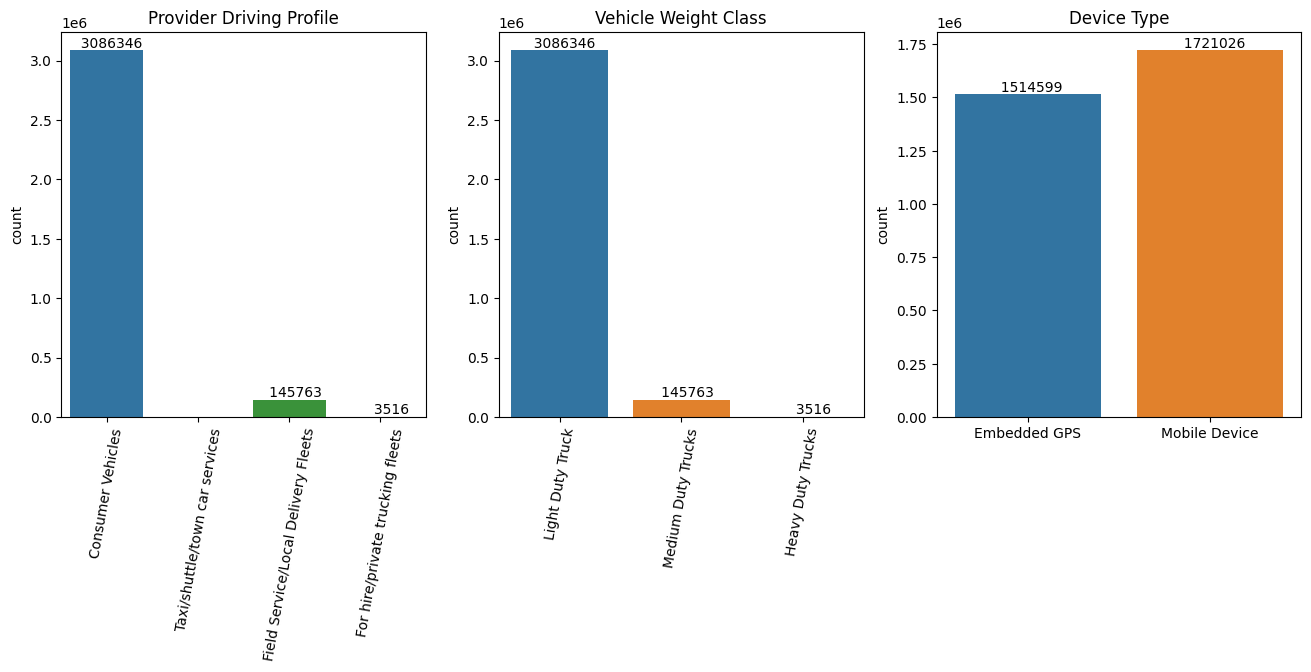

In [149]:
fig,[ax1,ax2,ax3] = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
sns.countplot(gdf['ProviderDrivingProfile'],ax=ax1,order=[1,2,3,4])
title1='Provider Driving Profile' 
ax1.set_title(title1)
ax1.set_xticklabels(['Consumer Vehicles','Taxi/shuttle/town car services','Field Service/Local Delivery Fleets','For hire/private trucking fleets'],rotation=80) 
ax1.set(xlabel=None)
ax1.bar_label(ax1.containers[0],fmt='%9.0f')

sns.countplot(gdf['VehicleWeightClass'],ax=ax2,order=[1,2,3])
title2 = 'Vehicle Weight Class' 
ax2.set_title(title2)
ax2.set_xticklabels(['Light Duty Truck','Medium Duty Trucks','Heavy Duty Trucks'],rotation=80)
ax2.set(xlabel=None)
ax2.bar_label(ax2.containers[0], fmt='%9.0f')


sns.countplot(gdf['ProbeSourceType'],ax=ax3)
ax3.set_title('Device Type')
ax3.set_xticklabels(['Embedded GPS','Mobile Device'])
ax3.set(xlabel=None)
ax3.bar_label(ax3.containers[0], fmt='%9.0f')


In [6]:
gdf.columns

Index(['Unnamed: 0', 'TripId', 'DeviceId', 'ProviderId', 'Mode', 'StartDate',
       'StartWDay', 'EndDate', 'EndWDay', 'StartLocLat', 'StartLocLon',
       'EndLocLat', 'EndLocLon', 'GeospatialType', 'ProviderType',
       'ProviderDrivingProfile', 'VehicleWeightClass', 'ProbeSourceType',
       'OriginZoneName', 'DestinationZoneName', 'EndpointType',
       'TripMeanSpeedKph', 'TripMaxSpeedKph', 'TripDistanceMeters',
       'MovementType', 'OriginCbg', 'DestCbg', 'StartTimezone', 'EndTimezone',
       'WaypointFreqSec', 'StartQk', 'EndQk', 'Startlocation', 'Endlocation',
       'MST_start_datetime', 'MST_end_datetime', 'MST_start_date',
       'MST_start_month', 'MST_start_day', 'MST_start_year', 'MST_start_time',
       'MST_start_hour', 'MST_start_minute', 'MST_start_second',
       'MST_end_date', 'MST_end_month', 'MST_end_day', 'MST_end_year',
       'MST_end_time', 'MST_end_hour', 'MST_end_minute', 'MST_end_second'],
      dtype='object')

In [76]:
# Calculate mean number of trips per year
mean_frequency = gdf.groupby(by = ["MST_start_year","Mode", "DeviceId"]).count()['TripId'].mean()
print('On average annually from 2020-2021, each device frequents Fort Carson ' + str(mean_frequency) + ' times.')


On average annually from 2020-2021, each device frequents Fort Carson 2.2512939830743743 times.


In [7]:
top_100_device_frequency = gdf['DeviceId'].value_counts().nlargest(1000)

print('Top 1000 most frequent deviceIds in 2020-2021:\n' ,top_100_device_frequency)

Top 1000 most frequent deviceIds in 2020-2021:
 c548accc49c53f0e2591820996a4a329    2398
e85f75f788dbc5c9b444f478e175fc7a    2101
b6626396035a865165d82cdb2ec5266f    2045
ed0f838a5ba008f72f7222c146964035    2006
db4ab3b32dd9db050e7617cbada6cde9    1999
                                    ... 
a53ac158e70c1cb7d81d95d489a75ee0     566
8032a942b15e26742c3f18d87463c4ab     566
7208714d8ecc84f2e5283f86ffed1ac1     564
e2977f76c5fc77ec49f6d97dc5c5b83d     564
80425393dfb6cf745b8bcc58195708a6     562
Name: DeviceId, Length: 1000, dtype: int64


In [158]:
# Plot top 10 trip frequency based on hour and deviceId
device_by_hour = gdf.groupby(['Mode','DeviceId','MST_start_hour']).count()['TripId'].nlargest(10)

In [159]:
device_by_hour

Mode  DeviceId                          MST_start_hour
1     ebcb363383e8c8edf655fb5a518d86ec  16                232
      cabefe4efdb41338332714fd0a04e3b8  13                216
      1ccf4f81680d43378e5d8959984dfa53  11                215
      ed0f838a5ba008f72f7222c146964035  6                 210
                                        14                202
      ccc249d0d0b14aabddc403d838d33ba1  11                199
      1ccf4f81680d43378e5d8959984dfa53  10                197
      23295f9237eb7951506b1877a258bf6a  15                194
      2ab64467b1bec47f0c1b07fc07cf1e56  11                193
      3893a994f4f5e9c5281d2f83e090432a  16                189
Name: TripId, dtype: int64

In [ ]:
trip_duration = pd.to_datetime(gdf['MST_end_datetime'])-pd.to_datetime(gdf['MST_start_datetime'])

days, seconds = trip_duration.apply(lambda x:x.days), trip_duration.apply(lambda x:x.seconds)
hours = days * 24 + seconds // 3600

trip_duration_minutes = (pd.to_datetime(gdf['MST_end_datetime'])-pd.to_datetime(gdf['MST_start_datetime'])).apply(lambda x:x.seconds//60)

Text(0.5, 0, 'trip duration (minutes)')

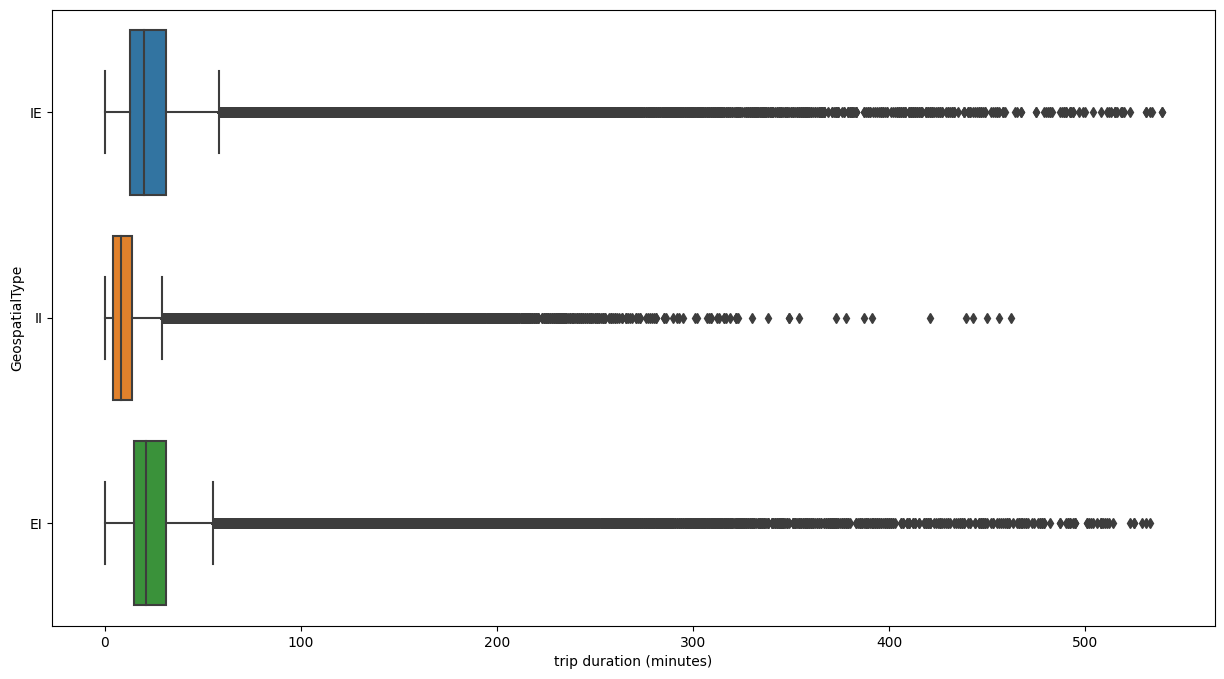

In [182]:
trip_duration_minutes = pd.DataFrame(trip_duration_minutes).rename(columns={0:'trips_minutes'})
trip_duration_minutes['GeospatialType'] = gdf['GeospatialType']


plt.figure(figsize=(15,8))
sns.boxplot(trip_duration_minutes['trips_minutes'],trip_duration_minutes['GeospatialType'],orient="h")
plt.xlabel('trip duration (minutes)')

In [153]:
trip_duration_minutes

,trips_minutes,GeospatialType
0,15,IE
1,11,IE
2,58,IE
3,20,II
4,13,IE
...,...,...
3235620,9,II
3235621,3,II
3235622,7,II
3235623,13,II


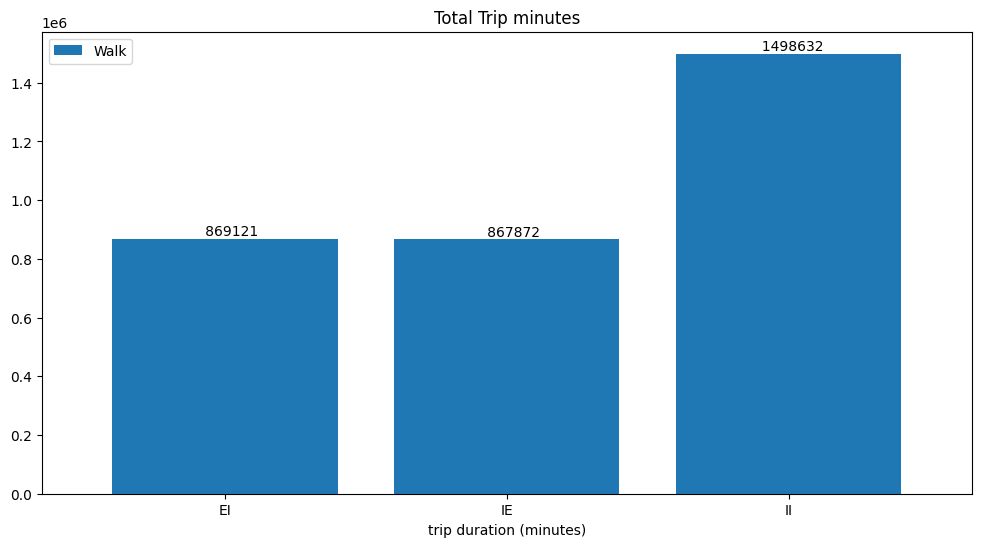

In [168]:
ax = trip_duration_minutes.groupby(by = ["GeospatialType"]).count()['trips_minutes'].plot.bar(figsize=(12, 6), width=0.8, linewidth=0.2, title='Total Trip minutes', rot=0, xlabel='trip duration (minutes)') 
ax.legend(index)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%9.0f')

In [ ]:
trip_duration_minutes.groupby(['MST_start_month'])['GeospatialType'].describe()

### Number of trips within vs. to vs. from Fort Carson

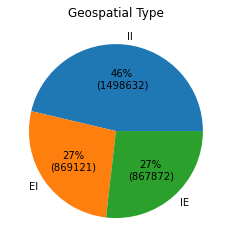

In [16]:
labels = ['II', 'EI', 'IE']

def my_fmt(x):
    total = len(gdf)
    return '{:.0f}%\n({:.0f})'.format(x, total*x/100)

plt.pie(gdf['GeospatialType'].value_counts(), labels=labels, autopct=my_fmt)
plt.title('Geospatial Type')
plt.show()


In [54]:
# Plot top 10 trip frequency based on hour and deviceId
device_by_hour = gdf.groupby(['Mode','DeviceId','MST_start_hour']).count()['TripId'].nlargest(10)

### Trips per Device

In [98]:
gdf.groupby('DeviceId').count()['TripId'].sort_values(ascending=False)

DeviceId
c548accc49c53f0e2591820996a4a329    2398
e85f75f788dbc5c9b444f478e175fc7a    2101
b6626396035a865165d82cdb2ec5266f    2045
ed0f838a5ba008f72f7222c146964035    2006
db4ab3b32dd9db050e7617cbada6cde9    1999
                                    ... 
57f1d362e6a962b6107b282f3ed990e9       1
57f1d0744851b6ea26871d741989a0d4       1
57f1ceba6f040da19db31c6c28f150a3       1
57f1c7ad410a9aa47b1bc09115160597       1
ffffef93feda2dabd6a5eccb77f025c3       1
Name: TripId, Length: 1425379, dtype: int64

### How often did they visit the facility?

##### To analyze the pattern of consumer visits to the facility, we have constructed bar charts of trips taken and grouped by day of the week for each trip type.

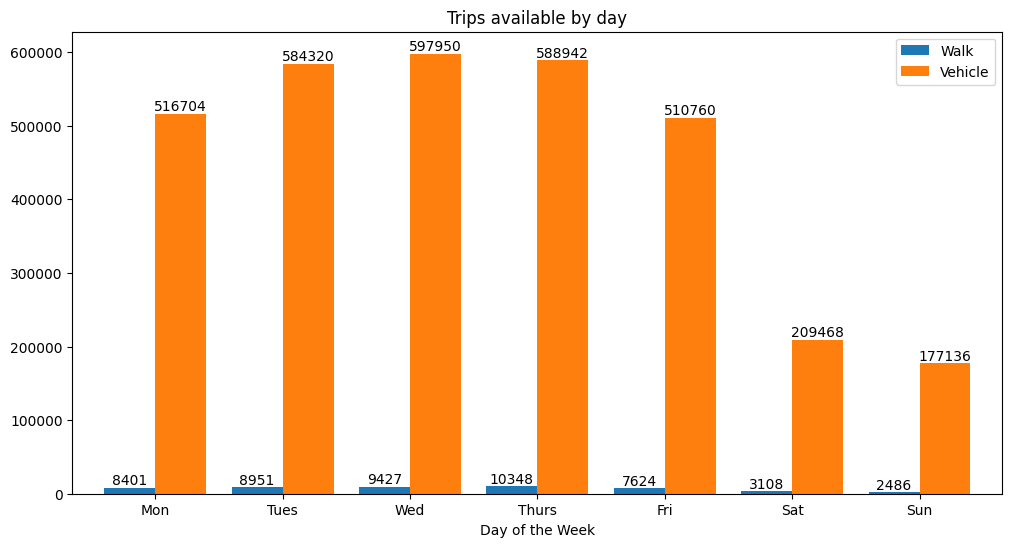

In [119]:
# Plotting bar chart for trips available by day (for each trip type)
index = ['Walk', 'Vehicle', 'Unknown']
ticks = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
trip_type = gdf.groupby(by = ["Mode","StartWDay"]).count()['TripId'].unstack(0).plot.bar(figsize=(12, 6), width=0.8, linewidth=0.2, title='Trips available by day', rot=0, xlabel="Day of the Week") 
trip_type.legend(index)
trip_type.set_xticklabels(ticks)
for bars in trip_type.containers:
    trip_type.bar_label(bars)

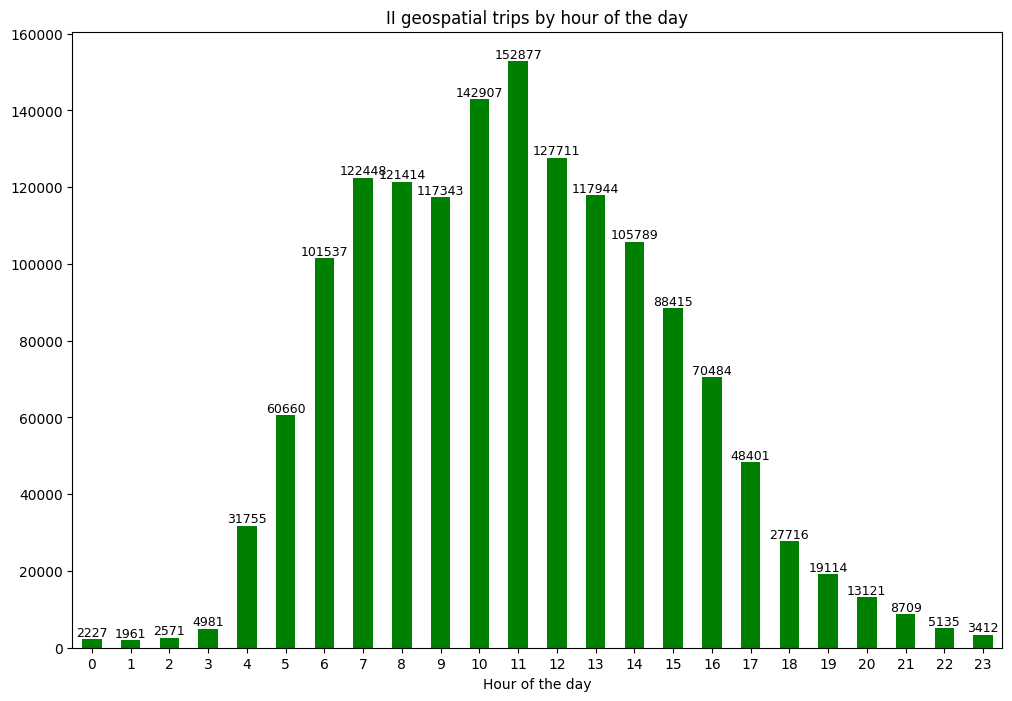

In [132]:
ii = gdf[gdf['GeospatialType']=='II'] 
ax = ii.groupby(by=['MST_start_hour']).count()['TripId'].plot.bar(title = 'II geospatial trips by hour of the day',xlabel='Hour of the day',color = 'green',rot = 0, figsize=(12, 8))

for bars in ax.containers:
    ax.bar_label(bars, size=9)

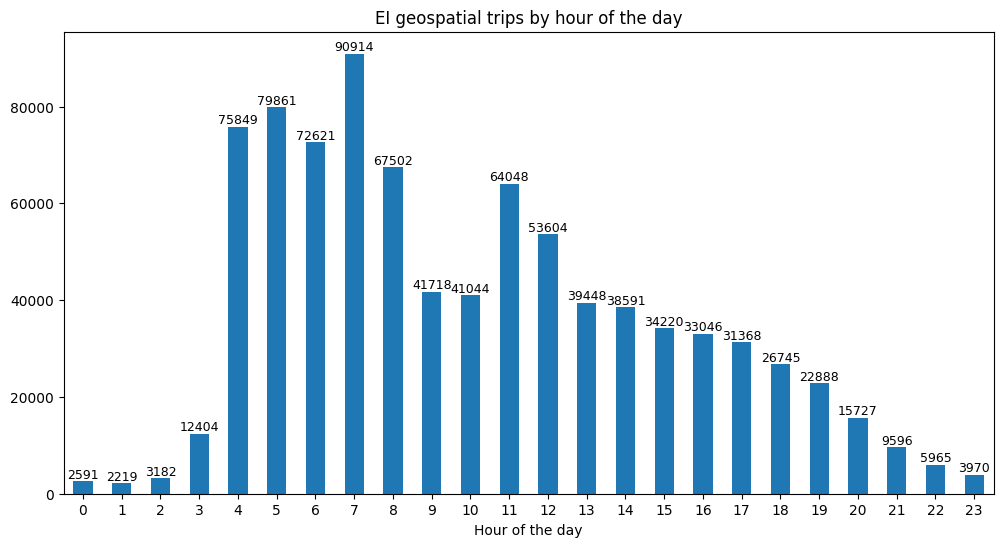

In [131]:
ei = gdf[gdf['GeospatialType']=='EI'] 
ax = ei.groupby(by=['MST_start_hour']).count()['TripId'].plot.bar(title = 'EI geospatial trips by hour of the day',xlabel='Hour of the day',rot = 0, figsize=(12, 6))
for bars in ax.containers:
    ax.bar_label(bars,size=8)

<AxesSubplot:title={'center':'IE geospatial trips by hour of the day'}, xlabel='Hour of the day'>

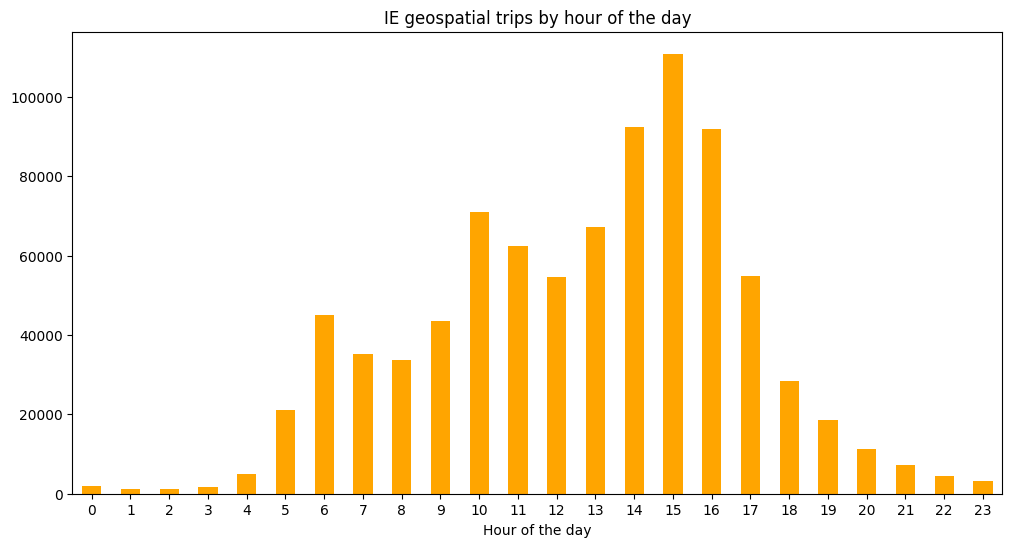

In [178]:
ie = gdf[gdf['GeospatialType']=='IE'] 
ie.groupby(by=['MST_start_hour']).count()['TripId'].plot.bar(title = 'IE geospatial trips by hour of the day',xlabel='Hour of the day',color = 'orange',rot = 0, figsize=(12, 6))

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

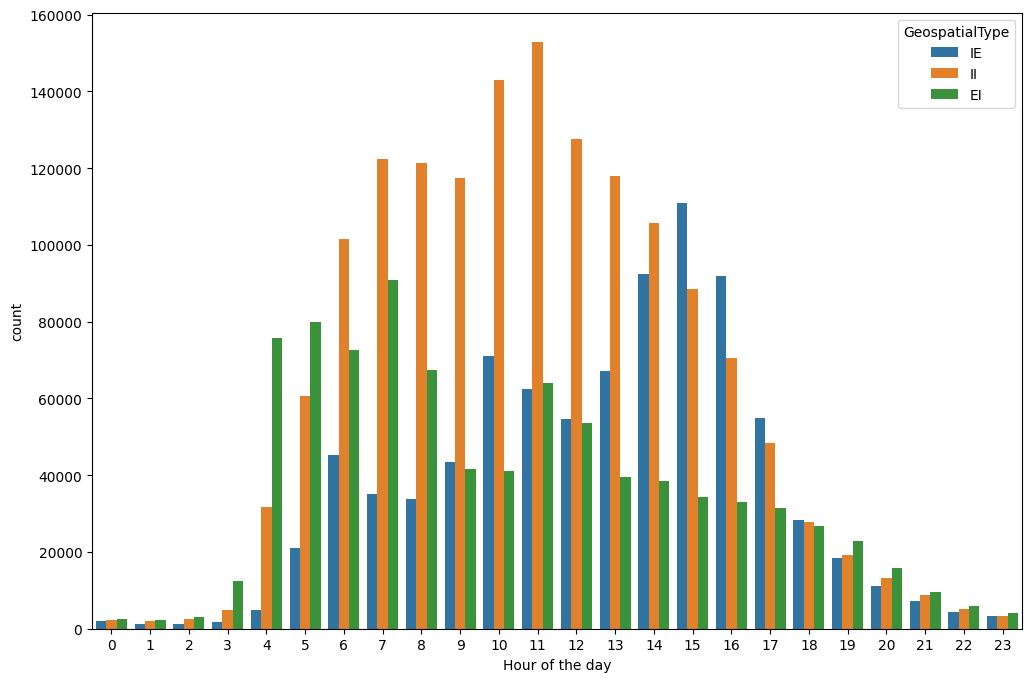

In [172]:
import matplotlib as mpl
mpl.rc_file_defaults()
ind = np.arange(24)
plt.figure(figsize=(12,8))
ax = sns.countplot(gdf['MST_start_hour'],hue=gdf['GeospatialType'])
ax.set_xlabel('Hour of the day')
ax.set_xticklabels(ind)


In [183]:
# Plot top 10 trip frequency based on hour and deviceId
device_by_hour = gdf.groupby(['Mode','DeviceId','MST_start_hour']).count()['TripId'].nlargest(10)

In [185]:
print('Top 10 trip frequency by hour and deviceId:')
device_by_hour

Top 10 trip frequency by hour and deviceId:


Mode  DeviceId                          MST_start_hour
1     ebcb363383e8c8edf655fb5a518d86ec  16                232
      cabefe4efdb41338332714fd0a04e3b8  13                216
      1ccf4f81680d43378e5d8959984dfa53  11                215
      ed0f838a5ba008f72f7222c146964035  6                 210
                                        14                202
      ccc249d0d0b14aabddc403d838d33ba1  11                199
      1ccf4f81680d43378e5d8959984dfa53  10                197
      23295f9237eb7951506b1877a258bf6a  15                194
      2ab64467b1bec47f0c1b07fc07cf1e56  11                193
      3893a994f4f5e9c5281d2f83e090432a  16                189
Name: TripId, dtype: int64

## Monthly Analysis

### Monthly mode frequency

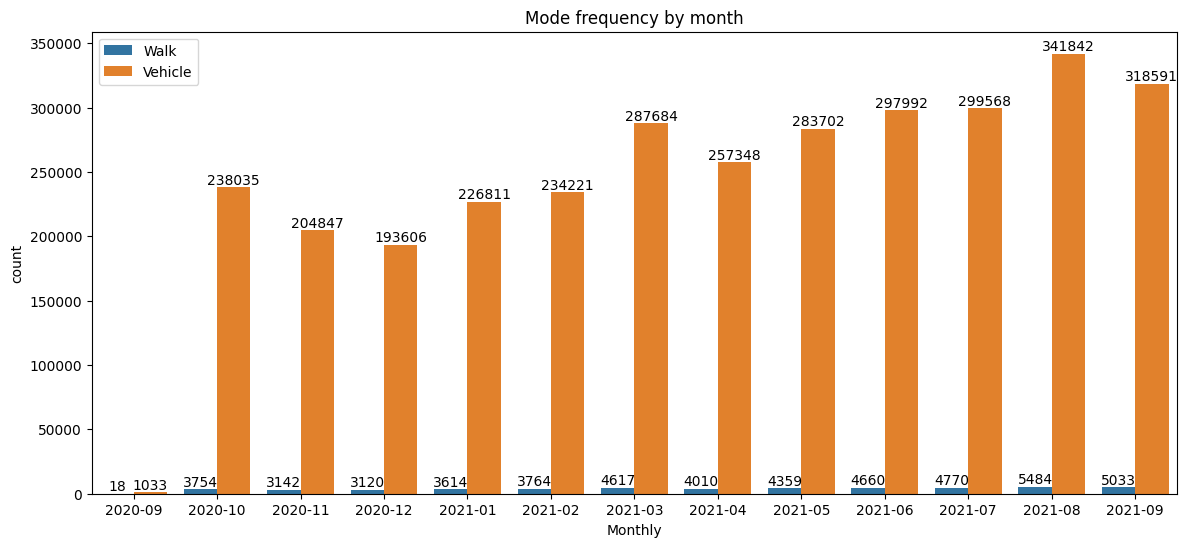

In [96]:
index = ['Walk', 'Vehicle']
plt.figure(figsize=(14,6))
ax = sns.countplot(sorted(gdf['start_year_month']),hue=gdf['Mode'])
ax.set_xlabel('Monthly')
ax.legend(index)
ax.set_title('Mode frequency by month')
for bars in ax.containers:
    ax.bar_label(bars)

### Monthly frequency by geospatial type

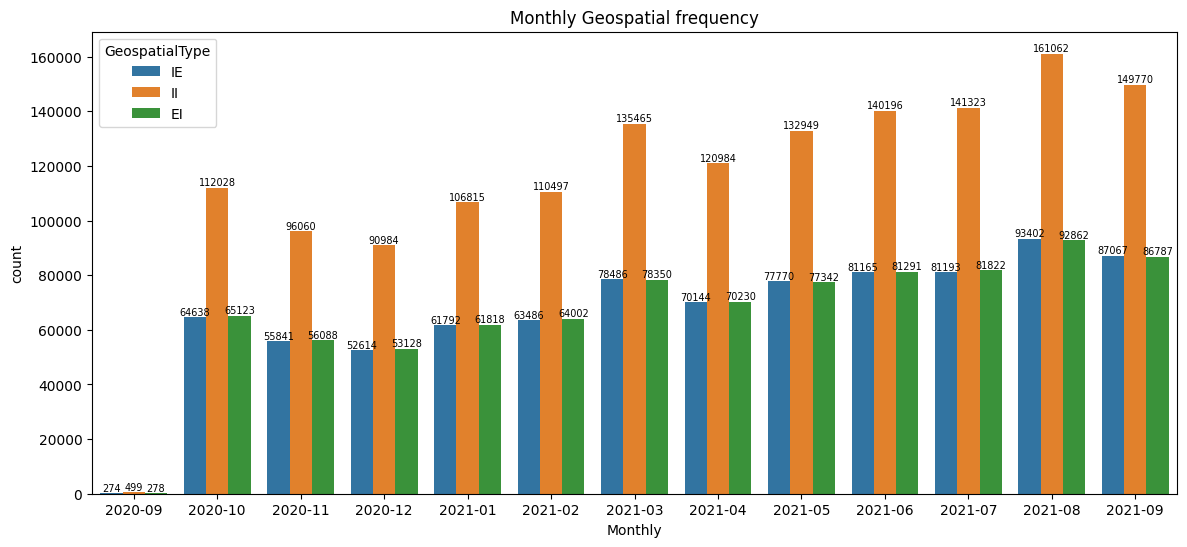

In [151]:
plt.figure(figsize=(14,6))
ax = sns.countplot(sorted(gdf['start_year_month']),hue=gdf['GeospatialType'])
ax.set_xlabel('Monthly')
ax.set_title('Monthly Geospatial frequency')

for bars in ax.containers:
    ax.bar_label(bars, size = 7)

### Trips per Device 

DeviceId
c548accc49c53f0e2591820996a4a329    2398
e85f75f788dbc5c9b444f478e175fc7a    2101
b6626396035a865165d82cdb2ec5266f    2045
ed0f838a5ba008f72f7222c146964035    2006
db4ab3b32dd9db050e7617cbada6cde9    1999
                                    ... 
57f1d362e6a962b6107b282f3ed990e9       1
57f1d0744851b6ea26871d741989a0d4       1
57f1ceba6f040da19db31c6c28f150a3       1
57f1c7ad410a9aa47b1bc09115160597       1
ffffef93feda2dabd6a5eccb77f025c3       1
Name: TripId, Length: 1425379, dtype: int64

### Total trips per month

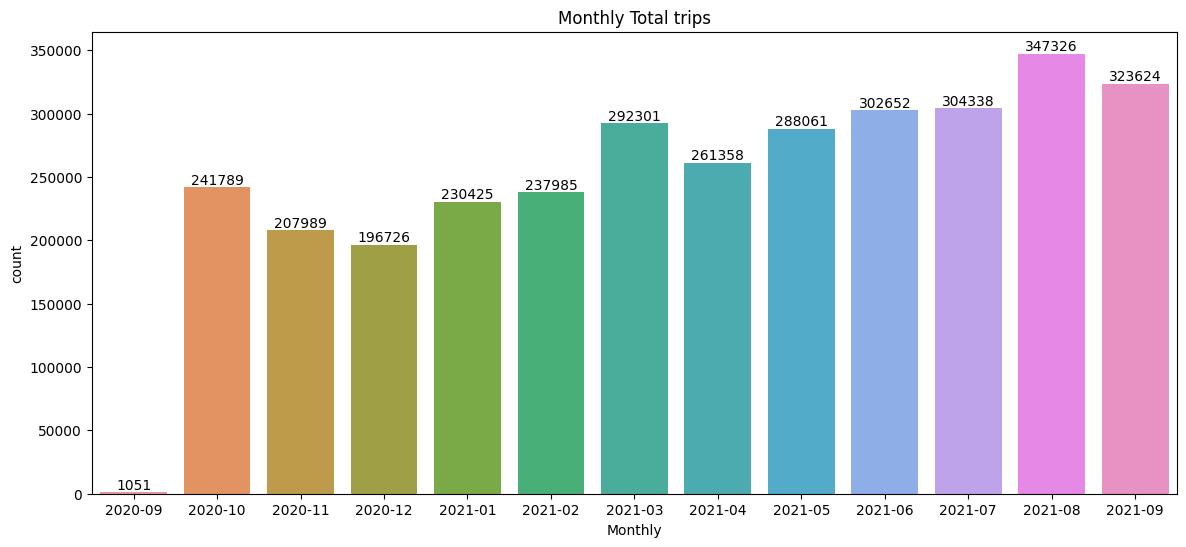

In [103]:
plt.figure(figsize=(14,6))
ax = sns.countplot(sorted(gdf['start_year_month']))
ax.set_xlabel('Monthly')
ax.set_title('Monthly Total trips')

for bars in ax.containers:
    ax.bar_label(bars)

## Seasonal Analysis

In [99]:
gdf['start_year_quarter'] = gdf["MST_start_year"].astype(str)+' '+pd.to_datetime(gdf['MST_start_datetime']).dt.quarter.apply(lambda x:"quarter"+str(x))

### Seasonal mode frequency

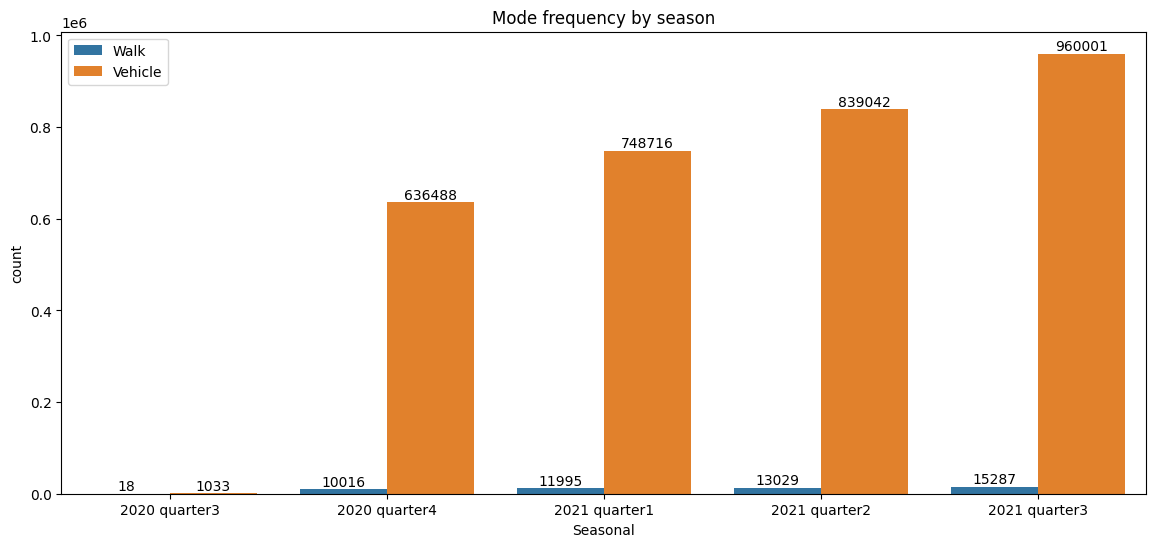

In [100]:
index = ['Walk', 'Vehicle']
plt.figure(figsize=(14,6))
ax = sns.countplot(sorted(gdf['start_year_quarter']),hue=gdf['Mode'])
ax.set_xlabel('Seasonal')
ax.legend(index)
ax.set_title('Mode frequency by season')

for bars in ax.containers:
    ax.bar_label(bars)

### Seasonal Geospatial Frequency

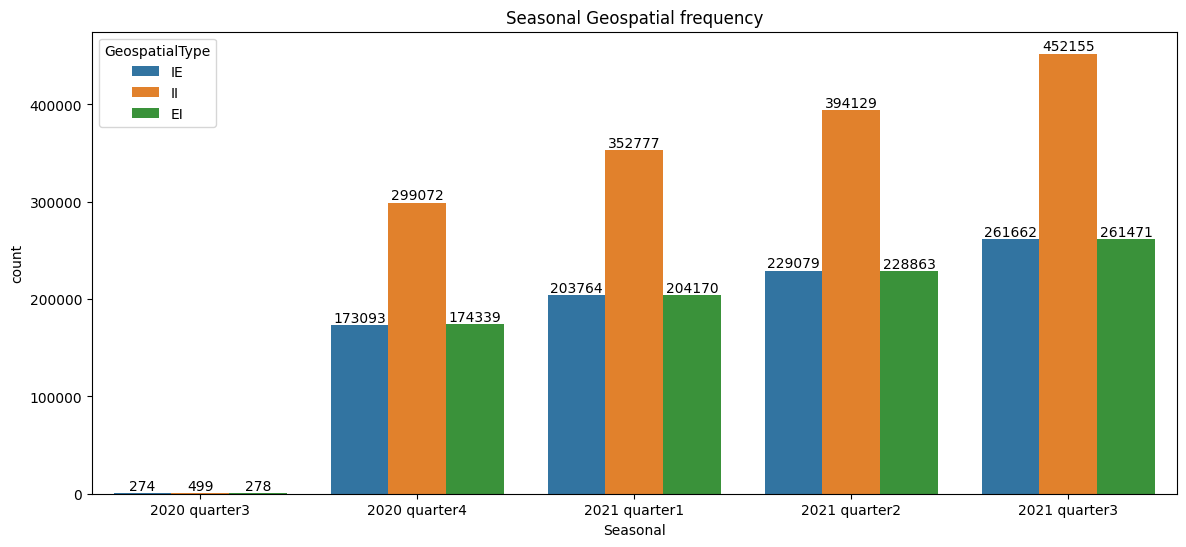

In [101]:
plt.figure(figsize=(14,6))
ax = sns.countplot(sorted(gdf['start_year_quarter']),hue=gdf['GeospatialType'])
ax.set_xlabel('Seasonal')
ax.set_title('Seasonal Geospatial frequency')

for bars in ax.containers:
    ax.bar_label(bars)

### Total Trips per Season

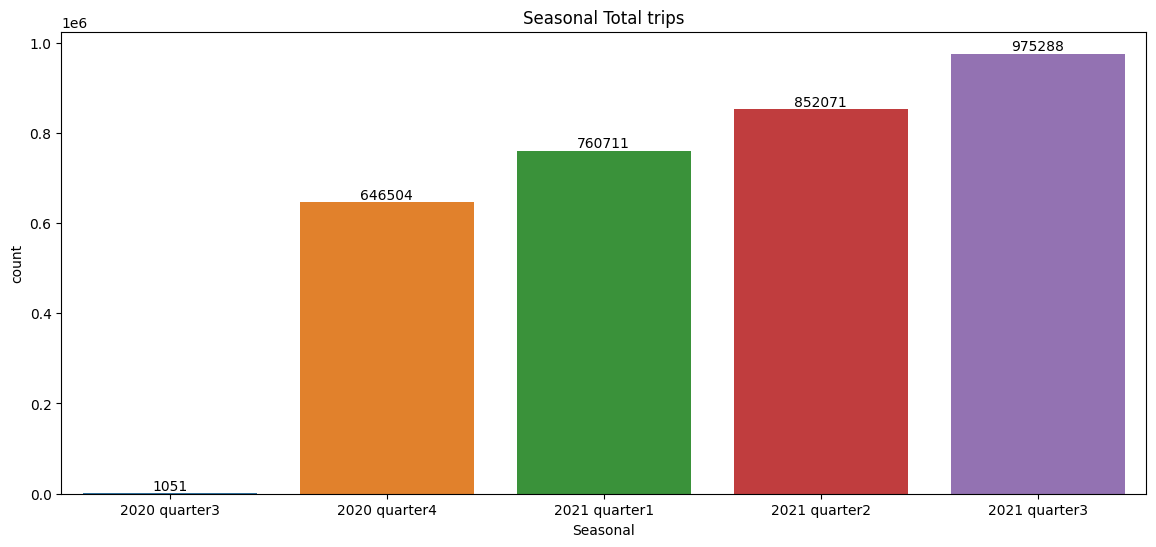

In [102]:
plt.figure(figsize=(14,6))
ax = sns.countplot(sorted(gdf['start_year_quarter']))
ax.set_xlabel('Seasonal')
ax.set_title('Seasonal Total trips')

for bars in ax.containers:
    ax.bar_label(bars)